In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Load the products dataset
products_df = pd.read_csv("Updated_Datasets/PRODUCTS_CLEANED.csv")


# Display basic information
print("Dataset Shape:", products_df.shape)
print("\nColumn Data Types:\n", products_df.dtypes)

Dataset Shape: (845552, 7)

Column Data Types:
 CATEGORY_1      object
CATEGORY_2      object
CATEGORY_3      object
CATEGORY_4      object
MANUFACTURER    object
BRAND           object
BARCODE         object
dtype: object


In [6]:
products_df.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,796494407820.0
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,023278011028.0
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,461817824225.0
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,035000466815.0
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,806810850459.0


In [7]:
# Check for missing values
print("\nMissing Values:\n", products_df.isnull().sum())


Missing Values:
 CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE              0
dtype: int64


In [8]:
# Load cleaned transactions data
df_transactions = pd.read_csv("Updated_Datasets/TRANSACTION_CLEANED.csv")

# Convert barcode to string in both datasets to ensure consistency
df_transactions['BARCODE'] = df_transactions['BARCODE'].astype(str)
products_df['BARCODE'] = products_df['BARCODE'].astype(str)

# Find barcodes in transactions that are missing in products
missing_barcodes = df_transactions[~df_transactions['BARCODE'].isin(products_df['BARCODE'])]['BARCODE'].unique()

print(f"Number of barcodes in transactions not found in products: {len(missing_barcodes)}")
if len(missing_barcodes) > 0:
    print("Sample missing barcodes:", missing_barcodes[:10])

Number of barcodes in transactions not found in products: 4466
Sample missing barcodes: ['037000828761.0' '024000393429.0' '752798149286.0' '070200504318.0'
 '071314003421.0' '054100018304.0' '078742236667.0' '030000010402.0'
 '051000224729.0' '681131097772.0']


In [9]:
# Find barcodes in products that are missing in transactions
missing_product_barcodes = products_df[~products_df['BARCODE'].isin(df_transactions['BARCODE'])]['BARCODE'].unique()

print(f"Number of barcodes in products not found in transactions: {len(missing_product_barcodes)}")
if len(missing_product_barcodes) > 0:
    print("Sample missing barcodes:", missing_product_barcodes[:10])

Number of barcodes in products not found in transactions: 834781
Sample missing barcodes: ['796494407820.0' '023278011028.0' '461817824225.0' '035000466815.0'
 '806810850459.0' '662658519183.0' '617737584217.0' '7501839106268.0'
 '075450128345.0' '00000000000nan']


In [10]:
# Analyzing category distribution
category_counts = products_df['CATEGORY_1'].value_counts()
category_counts

CATEGORY_1
Health & Wellness         512695
Snacks                    324817
Beverages                   3990
Pantry                       871
Apparel & Accessories        846
Dairy                        602
Needs Review                 547
Alcohol                      503
Home & Garden                115
Restaurant                    69
Deli & Bakery                 69
Frozen                        62
Meat & Seafood                49
Sporting Goods                47
Office & School               45
Toys & Games                  28
Household Supplies            24
Produce                       20
Animals & Pet Supplies        16
Arts & Entertainment           7
Electronics                    5
Mature                         3
Vehicles & Parts               3
Baby & Toddler                 3
Beauty                         2
Media                          2
Luggage & Bags                 1
Name: count, dtype: int64

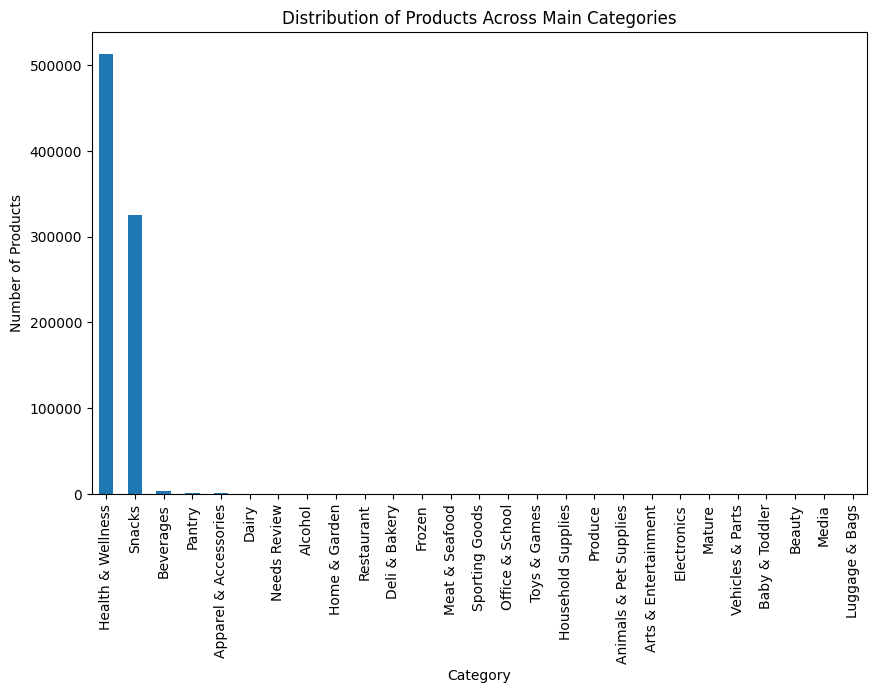

In [11]:
# Plotting the results
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Distribution of Products Across Main Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=90)
plt.show()

In [12]:
# # Fill missing brand names with a placeholder if necessary
products_df['BRAND'] = products_df['BRAND'].fillna('Unknown')

# Count the number of products by brand
brand_counts = products_df['BRAND'].value_counts().head(10)  # Limiting to top 10 brands for visualization
print(brand_counts)

BRAND
Unknown            226472
REM BRAND           20813
BRAND NOT KNOWN     17025
PRIVATE LABEL       13467
CVS                  6400
SEGO                 4831
MEIJER               4050
DOVE                 3857
RITE AID             3238
MATRIX               2958
Name: count, dtype: int64


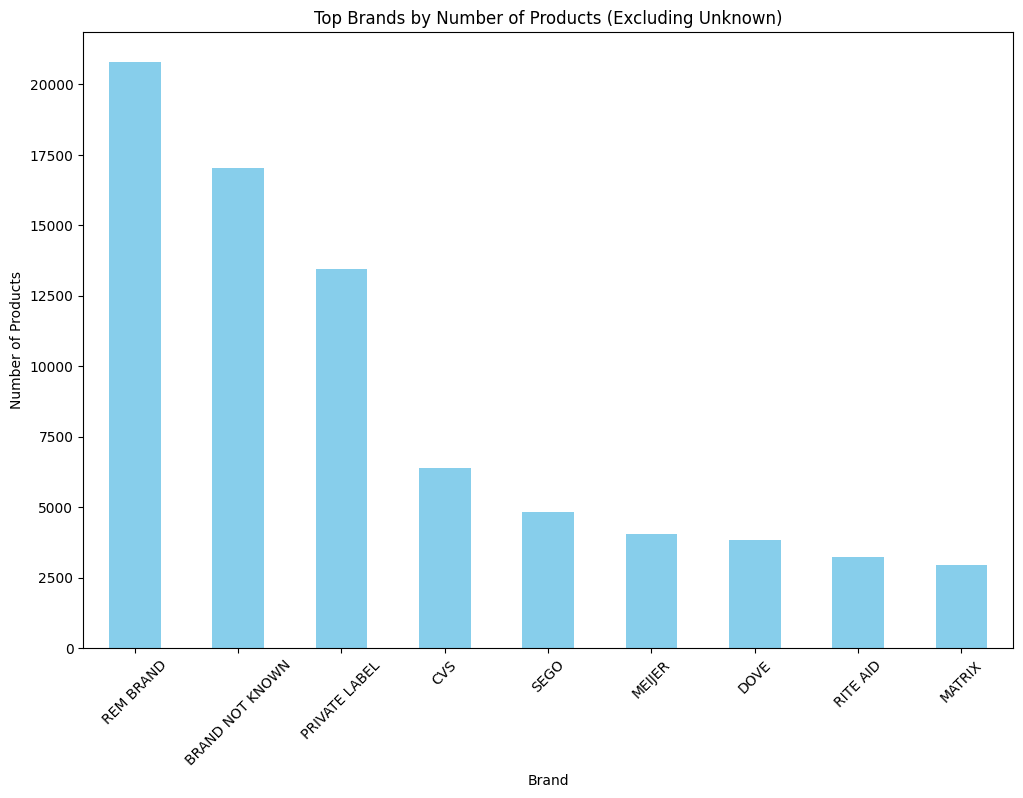

In [13]:
# Filter out 'Unknown' before plotting
filtered_brand_counts = brand_counts[brand_counts.index != 'Unknown']

# Plotting the filtered results
plt.figure(figsize=(12, 8))
filtered_brand_counts.plot(kind='bar', color='skyblue')
plt.title('Top Brands by Number of Products (Excluding Unknown)')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

### Data Quality Insights and Recommendations

The products data reveals a significant dominance of 'Unknown' and 'Brand Not Known' entries in the brand information, suggesting potential issues in data collection or integration processes. These ambiguities can lead to challenges in achieving accurate brand-based analytics and may affect market analysis reliability.

**Key Observations:**
- A large portion of the product entries are categorized under 'Unknown' or similar non-descriptive labels, which could hinder effective brand performance analysis.
- The high occurrence of these entries may indicate inconsistent data capturing standards or issues with upstream data sources.

**Recommended Actions:**
1. **Data Standardization:** Implement stricter validation rules at data entry points to ensure all products are associated with valid brand identifiers.
2. **Data Enrichment:** Collaborate with data providers to enrich the dataset with more accurate and detailed brand information.
3. **Anomaly Detection:** Apply anomaly detection techniques to identify and rectify outliers or misclassified entries in real-time.

By addressing these data quality issues, we can enhance the dataset's utility for more detailed and accurate market trend analysis, ultimately supporting more informed strategic decisions.